<a href="https://colab.research.google.com/github/sahitiedupuganti/FUTURE_ML_02/blob/main/FUTURE_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#data visualisation
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #bcz we hv many categorical variables to convert them into numeric
from imblearn.over_sampling import SMOTE#to handle class imbalance, here in ds many are yes
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle#save n use files later

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

#2.data loading n understanding
#load csv data to a pandas df
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

pd.set_option("display.max_columns",None)#this allows to not truncTate any columns

In [ ]:

#dropping cust id as this is not required for modelling
df=df.drop(columns=["customerID"])

In [ ]:

df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:

print(df["gender"].unique())

['Female' 'Male']


In [ ]:

print(df["SeniorCitizen"].unique())

[0 1]


In [ ]:
#printing unique values in all columns
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
 if col not in numerical_features_list:

  print(col,df[col].unique())
  print("."*50)

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No phone service' 'No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes' 'No internet service']
..................................................
OnlineBackup ['Yes' 'No' 'No internet service']
..................................................
DeviceProtection ['No' 'Yes' 'No internet service']
..................................................
TechSupport ['No' 'Yes' 'No internet service']
..................................................
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:


df.isnull().sum() #gives missing values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:

df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:

len(df[df["TotalCharges"]==" "])

11

In [ ]:

df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"}) #replace thta empty space as string with 0

In [ ]:

df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the distribution of target column
print(df["Churn"].value_counts())
#clear imbalance between the values of yes n no

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  #calculaye mean and median values for columns
  col_mean= df[column_name].mean()
  col_median=df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="--",label="Median")

  plt.legend()

  plt.show()


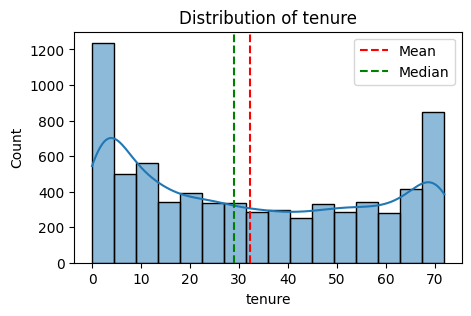

In [ ]:
plot_histogram(df,"tenure")

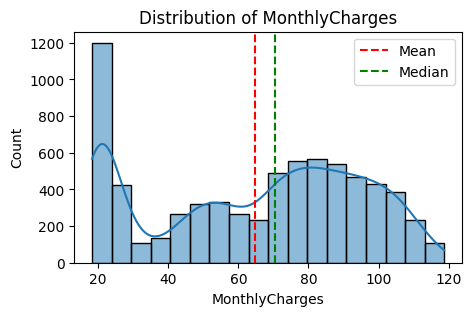

In [ ]:
plot_histogram(df,"MonthlyCharges")

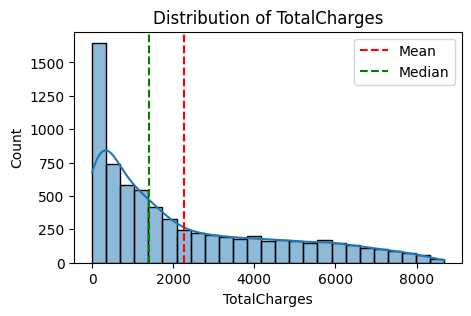

In [ ]:
plot_histogram(df,"TotalCharges")


In [ ]:

def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"boxplot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

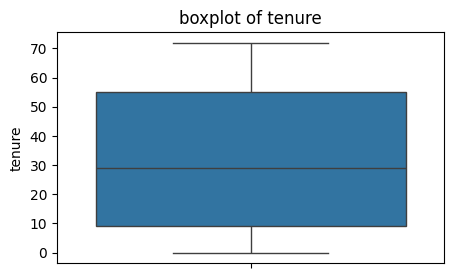

In [ ]:

plot_boxplot(df,"tenure")

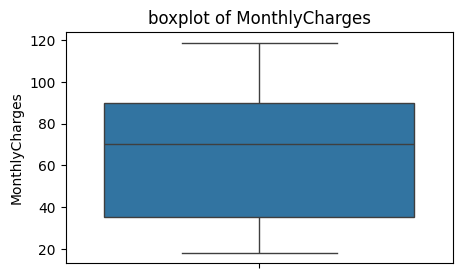

In [ ]:

plot_boxplot(df,"MonthlyCharges")

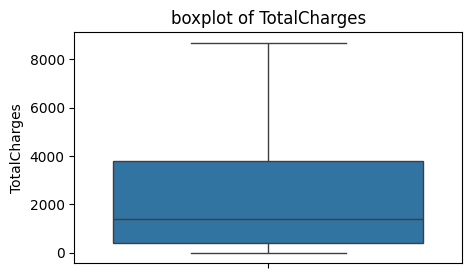

In [ ]:
plot_boxplot(df,"TotalCharges")

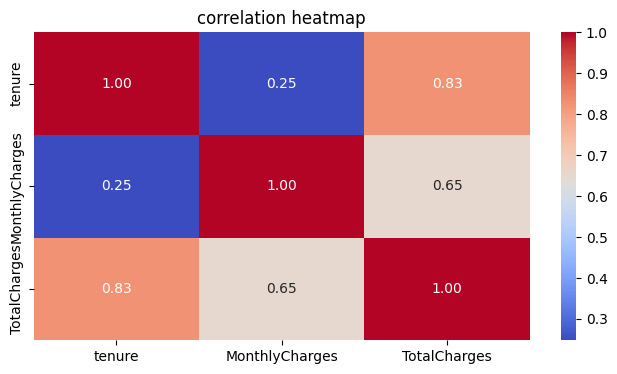

In [ ]:

#correlation matrix-heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

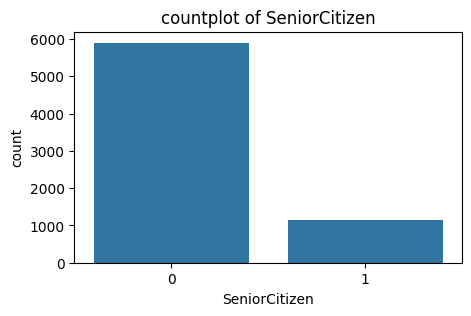

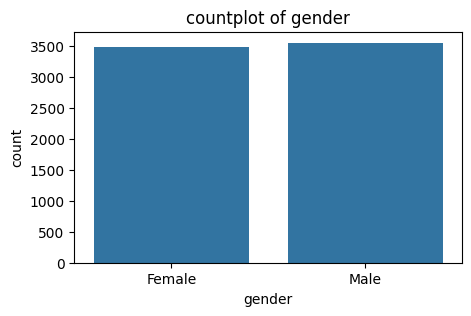

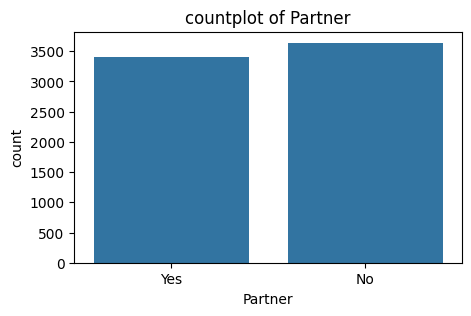

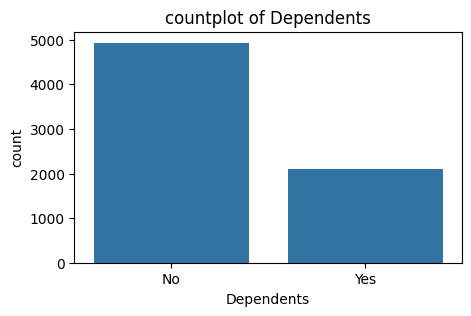

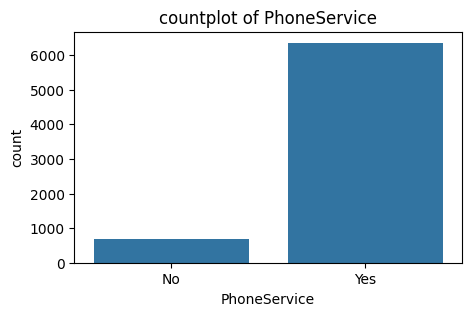

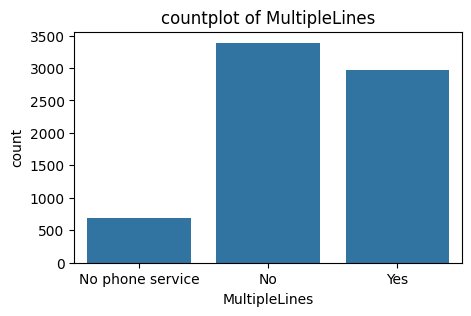

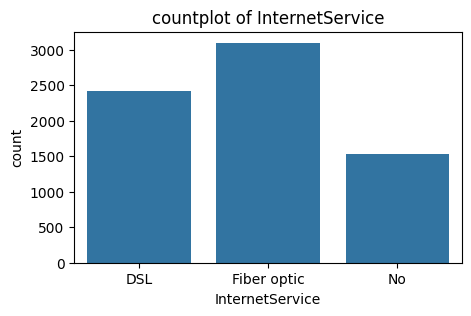

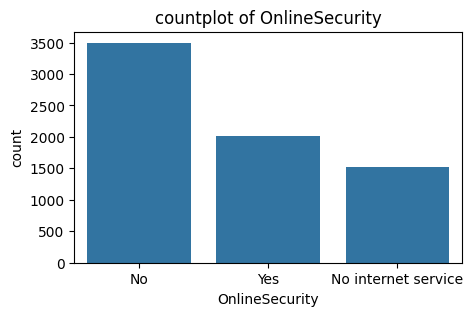

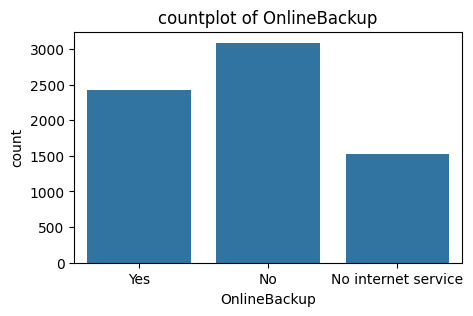

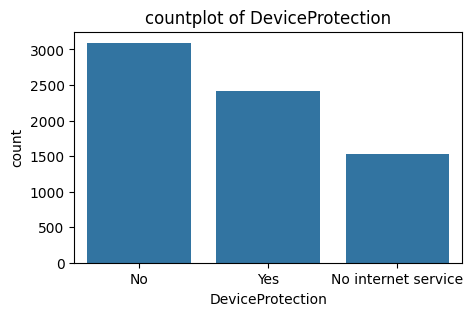

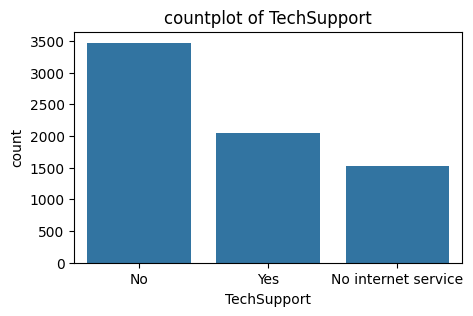

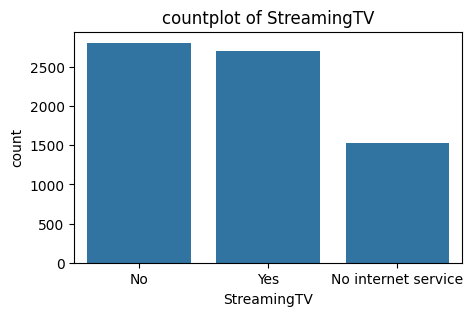

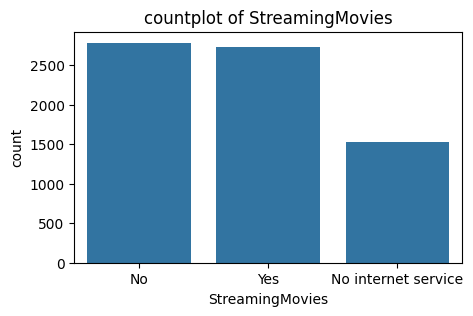

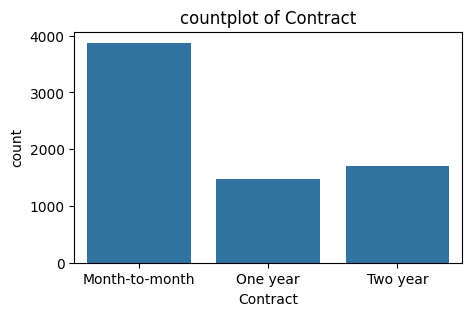

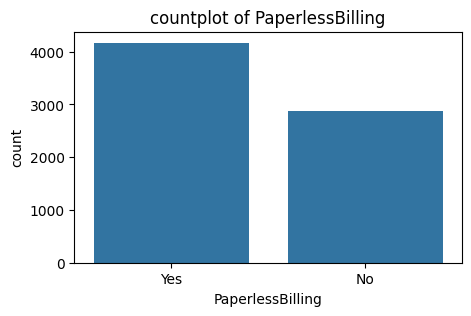

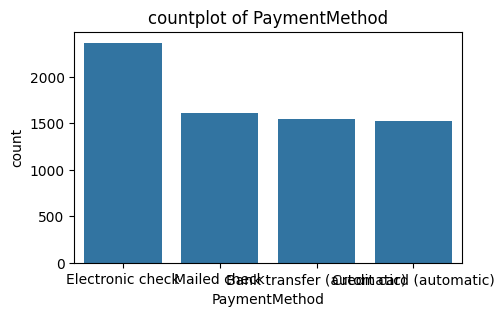

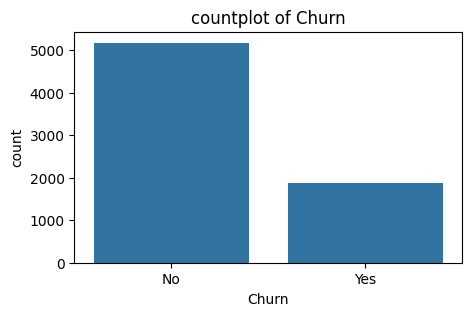

In [ ]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["SeniorCitizen"]+object_cols
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"countplot of {col}")
  plt.show()

In [ ]:

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df["Churn"]= df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-1733548797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]= df["Churn"].replace({"Yes":1,"No":0})


In [ ]:


print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
#identify columns with object datatype
object_columns = df.select_dtypes(include="object").columns


In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:


#initialize a dictionary to save encoders
encoders={}

#apply label encoding
for col in object_columns:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

#save the encoders to a pickle file
with open("encoders.pkl","wb")as f:
  pickle.dump(encoders,f)


In [ ]:
#splitting the features and target
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [ ]:


print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:


print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [ ]:

#split training n test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:

print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [ ]:

smote=SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:


print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:


#dictionary of models
models={
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [ ]:

#dict to store cross validation results
cv_scores={}

In [ ]:
#perfoorm s-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training{model_name} with default parameters")
  scores=cross_val_score(model,X_train_smote,y_train_smote ,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*50)


TrainingDecisionTree with default parameters
DecisionTree cross-validation accuracy: 0.78
--------------------------------------------------
TrainingRandomForest with default parameters
RandomForest cross-validation accuracy: 0.84
--------------------------------------------------
TrainingXGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------


In [ ]:

cv_scores

{'DecisionTree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'RandomForest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

In [ ]:

rfc= RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:

print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
#evaluate on test data
y_test_pred = model.predict(X_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("-"*50)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("-"*50)
print("Classification Report:\n",classification_report(y_test,y_test_pred))


Accuracy Score:
 0.7806955287437899
--------------------------------------------------
Confusion Matrix:
 [[885 151]
 [158 215]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:

#save the trained model as pickle file'
model_data={"model":rfc,"features_names":X.columns.tolist()}


with open("customer_churn_model.pkl","wb")as f:
  pickle.dump(model_data,f)

In [ ]:

#load the saved model and encoders

with open("customer_churn_model.pkl","rb")as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["features_names"]


print(loaded_model)

RandomForestClassifier(random_state=42)

print(feature_names)


RandomForestClassifier(random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:


from sklearn.ensemble import RandomForestClassifier
import pickle

# Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save it
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)



with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)



input_data={'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 1, 'PhoneService': 'No', 'MultipleLines': 'No phone service', 'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No', 'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'MonthlyCharges': 29.85, 'TotalCharges': 29.85}

input_data_df=pd.DataFrame([input_data])


with open("encoders.pkl","rb")as f:
  encoders=pickle.load(f)

print(input_data_df.head())

#encode categorical featuires using the saved   encoders
for column,encoder in encoders.items():
  input_data_df[column]= encoder.transform(input_data_df[column])

#make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob=loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"prediction probability:{pred_prob}")


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[0]
Prediction: No Churn
prediction probability:[[0.77 0.23]]


In [ ]:
import pandas as pd
import pickle

# Step 1: Input data as a dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Step 2: Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
"""with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)"""

# Step 5: Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 6: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 7: Output the results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0]}")




Prediction: No Churn
Prediction Probability: [0.77 0.23]


In [ ]:
import pandas as pd
import pickle

# Step 1: Input data as a dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
# Step 2: Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Step 5: Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 6: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 7: Output the results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0]}")

# Step 8: Create a new DataFrame with input data and prediction results
output_data = input_data_df.copy()
output_data['Prediction'] = prediction[0]
output_data['PredictionProbability_NoChurn'] = pred_prob[0][0]
output_data['PredictionProbability_Churn'] = pred_prob[0][1]


# Step 9: Save the output DataFrame to a CSV file
output_data.to_csv("prediction_output.csv", index=False)
print("\nPrediction output saved to prediction_output.csv")


Prediction: No Churn
Prediction Probability: [0.77 0.23]

Prediction output saved to prediction_output.csv


In [ ]:
import pandas as pd
import pickle

# Step 1: Input data as a dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
# Step 2: Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Step 5: Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 6: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 7: Output the results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0]}")

# Step 8: Create a new DataFrame with input data and prediction results
output_data = input_data_df.copy()
output_data['Prediction'] = prediction[0]
output_data['PredictionProbability_NoChurn'] = pred_prob[0][0]
output_data['PredictionProbability_Churn'] = pred_prob[0][1]

# Step 9: Save the output DataFrame to a CSV file
output_data.to_csv("prediction_output.csv", index=False)
print("\nPrediction output saved to prediction_output.csv")




Prediction: No Churn
Prediction Probability: [0.77 0.23]

Prediction output saved to prediction_output.csv


In [ ]:
import pandas as pd
import pickle

# Step 1: Load the original dataset
df_original = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Step 2: Create a copy for processing and drop the original Churn column
df_processed = df_original.copy()
# Rename the original 'Churn' column to 'Actual_Churn' before dropping for clarity
df_processed = df_processed.rename(columns={'Churn': 'Actual_Churn'})
df_processed = df_processed.drop(columns=["Actual_Churn"])


# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Step 5: Encode categorical features using the saved encoders for the entire original dataframe
input_data_df = df_processed.copy()
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        # Handle potential unseen values in the original dataset during encoding by adding a fallback
        try:
            input_data_df[column] = encoder.transform(input_data_df[column])
        except ValueError as e:
            print(f"Warning: Could not transform column '{column}'. Encountered unseen values. Error: {e}")
            # Optionally, handle this by mapping unseen values to a default or NaN
 # Step 6: Handle the "TotalCharges" column - replace spaces and convert to float
input_data_df["TotalCharges"] = input_data_df["TotalCharges"].replace({" ":"0.0"})
input_data_df["TotalCharges"] = input_data_df["TotalCharges"].astype(float)


# Step 7: Make predictions for all rows
predictions = loaded_model.predict(input_data_df.drop(columns=["customerID"])) # Drop customerID for prediction
pred_probs = loaded_model.predict_proba(input_data_df.drop(columns=["customerID"]))[:, 1] # Get probability of churn


# Step 8: Add prediction results to the original dataframe
df_original['Predicted_Churn'] = predictions
df_original['Churn_Probability'] = pred_probs


# Step 9: Rename the original Churn column to "Churn (actual)" and select specified columns
df_original = df_original.rename(columns={'Churn': 'Churn (actual)'})
output_columns = [
    'customerID',
    'gender',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Contract',
    'OnlineSecurity',
    'TechSupport',
    'PaymentMethod',
    'OnlineBackup',
    'Dependents',
    'InternetService',
    'Partner',
    'DeviceProtection',
    'Churn (actual)',
    'Predicted_Churn',
    'Churn_Probability'
]
output_df = df_original[output_columns]
         # For now, skipping this column or handling error as per requirement
         # Step 10: Save the output DataFrame to a CSV file
output_df.to_csv("full_dataset_predictions.csv", index=False)
print("Predictions for the entire dataset with selected columns saved to full_dataset_predictions.csv")



Predictions for the entire dataset with selected columns saved to full_dataset_predictions.csv


In [ ]:


(input_data_df.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
with open("customer_churn_model.pkl","rb")as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["features_names"]


loaded_model.fit(X_train_smote, y_train_smote)
feature_importances = loaded_model.feature_importances_


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
18,TotalCharges,0.141563
17,MonthlyCharges,0.136518
14,Contract,0.126562
4,tenure,0.121823
8,OnlineSecurity,0.086714
11,TechSupport,0.073617
16,PaymentMethod,0.044333
9,OnlineBackup,0.038016
3,Dependents,0.030381
7,InternetService,0.030181


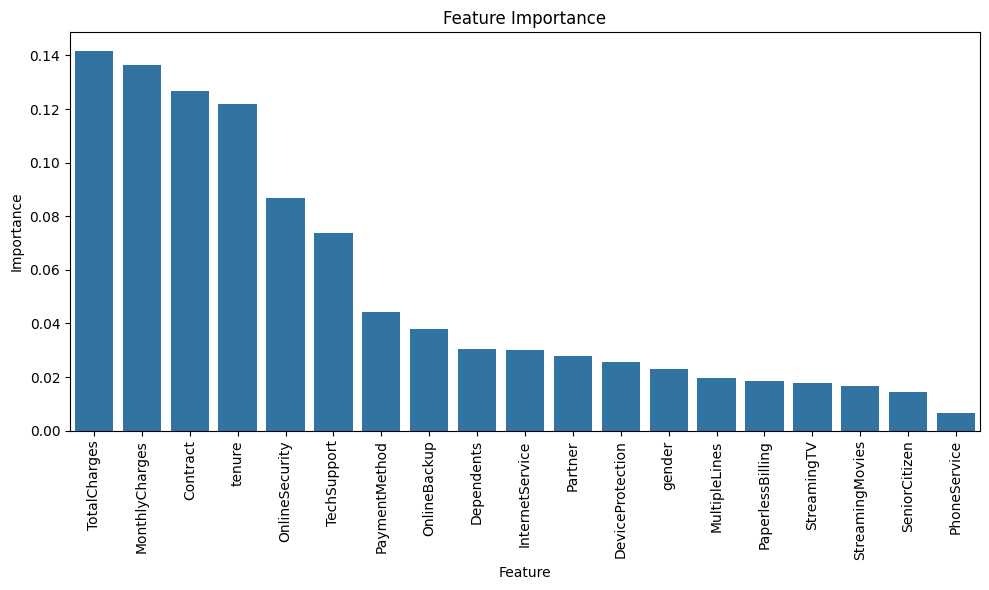

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()